In [1]:
import recommendation_system.recommend_system_package.contented_base
import recommendation_system.recommend_system_package.collab_filtering
import matplotlib.pyplot as plt
import recommendation_system.function_package.read_data_function
import pandas as pd
import numpy as np

In [2]:
rating_columns = ['student_id', 'course_id', 'rating']
course_names = ['course_id', 'name']
ratings_base = pd.read_csv('course_data/rating.csv', sep=',', names=rating_columns, encoding='latin-1')

course_names = pd.read_csv('course_data/course.csv', sep=',' , names=course_names, on_bad_lines='skip')

print(len(ratings_base))
print(len(course_names))

# rating = ratings_base.to_numpy()
# rating[:, :2] -= 1

rating = recommendation_system.function_package.read_data_function.get_dataframe_ratings_base('course_data/rating.csv')

course_data = pd.merge(ratings_base, course_names, on='course_id')

print(course_data)

252
49
     student_id  course_id  rating                                name
0             1          1       5                Learn more about pRe
1             1          1       5                Learn more about pRe
2             2          1       3                Learn more about pRe
3             1          1       5                Learn more about pRe
4             4          1       1                Learn more about pRe
..          ...        ...     ...                                 ...
247          13         47       4  Technical Writing and Presentation
248          15         47       5  Technical Writing and Presentation
249          22         47       5  Technical Writing and Presentation
250          23         47       5  Technical Writing and Presentation
251          25         47       5  Technical Writing and Presentation

[252 rows x 4 columns]


                                                      rating  \
name                                                           
72 AutoCAD 2D & 3D Drawings and Practical Projects  3.285714   
Acoustic Guitar and Electric Guitar Lessons: Ge...  3.300000   
Adobe Illustrator Advanced Vector Artwork           3.285714   
Adobe Illustrator CC Mastery: Zero to Hero in I...  3.666667   
Affinity Photo for the iPad                         2.833333   
AutoCAD 2021 Complete Course - Practical Approach   3.500000   
Become a SpeedDemon 1: Productivity Tricks to H...  3.800000   
Beginner Nikon Digital SLR (DSLR) Photography       4.000000   
Complete Guitar Lessons System - Beginner to Ad...  4.000000   
Ghep anh chuyen nghiep voi Photoshop                3.500000   
Hoc Autocad co ban cho den nang cao                 4.250000   
Hoc ve chung khoan                                  3.500000   
How To Build A Brand On Social Media!               4.666667   
Hệ thống thông tin quản lý              

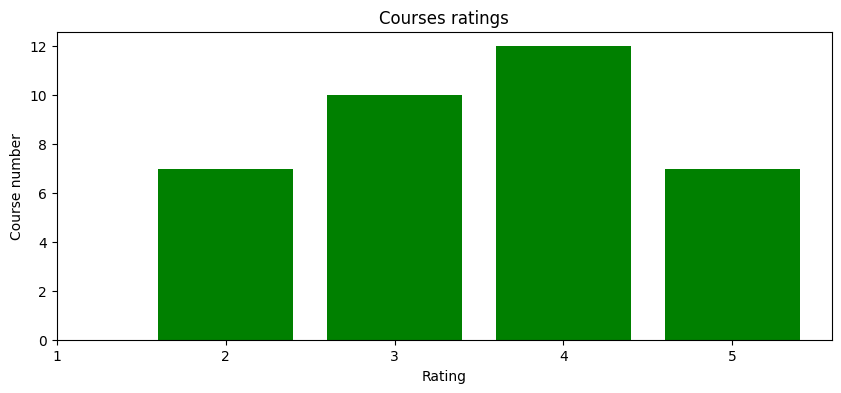

In [3]:
trend = pd.DataFrame(course_data.groupby('name')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(course_data.groupby('name')['rating'].count())

# for index, row in trend.iterrows():
#     print(index, row[0], int(row[1].round()))
print(trend)
plt.figure(figsize=(10, 4))
plt.bar(trend['rating'].round(),trend['total number of ratings'], color='g')

plt.xlabel('Rating')
plt.xticks([1,2,3,4,5])
plt.ylabel('Course number')
plt.title('Courses ratings')
plt.show()



In [4]:
course_names1 = ['id', 'name']

course_names1 = pd.read_csv('course_data/course.csv', sep=',', names=course_names1)

list_c = course_names1['name'].values 

In [5]:
cf_rs = recommendation_system.recommend_system_package.collab_filtering.CF(rating, k = 2, uuCF = 1)
cf_rs.fit()
# print(recommend)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [7]:
# Hàm recommend 
#   input: id của người dùng
#   output: đưa ra 1 list id các khóa học mà hệ thống 
#           dự đoán người dùng sẽ thích ( rate > 0 )
recommend = cf_rs.recommend(1)
list = []
for i in range(len(recommend)):
    new = {
        'id': recommend[i],
        'name': list_c[recommend[i] - 1]
    }
    list.append(new)
print('Số lượng khóa học:', len(list))
print(list)

recommend_top = cf_rs.recommend_top(1, 10)
print(recommend_top)

Số lượng khóa học: 9
[{'id': 11, 'name': 'Photoshop Beginners Mastery: Zero to Hero in Photoshop'}, {'id': 19, 'name': 'Learn Guitar in 21 Days'}, {'id': 32, 'name': 'Permanent makeup full LIPS masterclass'}, {'id': 35, 'name': 'How To Build A Brand On Social Media!'}, {'id': 36, 'name': 'Ultimate SEO, Social Media, & Digital Marketing Course 2023'}, {'id': 38, 'name': 'Kỹ năng mềm'}, {'id': 40, 'name': 'Thuật toán ứng dụng'}, {'id': 43, 'name': 'Nguyên lý marketing'}, {'id': 47, 'name': 'Technical Writing and Presentation'}]
[{'id': 47, 'similar': 0.9999999793264736}, {'id': 11, 'similar': 0.9999999617573552}, {'id': 19, 'similar': 0.9999999617573552}, {'id': 38, 'similar': 0.9999999617573552}, {'id': 32, 'similar': 0.999999955000002}, {'id': 35, 'similar': 0.999999955000002}, {'id': 36, 'similar': 0.999999955000002}, {'id': 40, 'similar': 0.999999955000002}, {'id': 43, 'similar': 0.5405882806684628}, {'id': 0, 'similar': 0.0}]
